In [25]:
import pandas as pd
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import *



from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from scipy import stats


In [26]:
# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)


df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df["target"] = housing.target

df = df[(np.abs(stats.zscore(df)) < 5).all(axis=1)]
df = df.reset_index(drop=True)
X = df[housing.feature_names]
targets = df["target"]
# Always use transform_data function on X
scaler = StandardScaler().fit(np.array(targets).reshape(-1, 1))
targets = scaler.transform(np.array(targets).reshape(-1, 1)).flatten()

df["target"] = targets
data=df

In [27]:
import sys
sys.path.append('..')
from xDL.models.xMLP import XplainMLP
from xDL.utils.data_utils import *

In [28]:
EARLY_STOPPING = EarlyStopping(
        patience=15, restore_best_weights=True, min_delta=1e-05, monitor="val_loss"
    )


In [29]:
model = XplainMLP(
        data=data, 
        y="target",
        output_activation="linear",
        binning_task="regression",
        num_encoding="one_hot_discretized",
        n_bins_num=25,
        batch_size=256,
        dropout=0.5,
        activation="relu",
        hidden_units=[128, 64]
        )


--- Preprocessing ---


0it [00:00, ?it/s]

9it [00:06,  1.38it/s]


In [30]:
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer = optimizer,
    loss = "mse",
    metrics= "mse",
    )

In [31]:
history = model.fit(
    model.training_dataset, 
    epochs=150, 
    validation_data=model.validation_dataset,
    callbacks=[EARLY_STOPPING],
    verbose=1,
)

Epoch 1/150


64/64 [==============================] - 1s 8ms/step - loss: 0.8593 - mse: 0.8593 - val_loss: 0.5290 - val_mse: 0.5290
Epoch 2/150
64/64 [==============================] - 1s 7ms/step - loss: 0.5304 - mse: 0.5304 - val_loss: 0.3511 - val_mse: 0.3511
Epoch 3/150
64/64 [==============================] - 1s 7ms/step - loss: 0.4375 - mse: 0.4375 - val_loss: 0.3116 - val_mse: 0.3116
Epoch 4/150
64/64 [==============================] - 0s 6ms/step - loss: 0.3933 - mse: 0.3933 - val_loss: 0.3014 - val_mse: 0.3014
Epoch 5/150
64/64 [==============================] - 1s 7ms/step - loss: 0.3606 - mse: 0.3606 - val_loss: 0.2754 - val_mse: 0.2754
Epoch 6/150
64/64 [==============================] - 0s 6ms/step - loss: 0.3496 - mse: 0.3496 - val_loss: 0.2715 - val_mse: 0.2715
Epoch 7/150
64/64 [==============================] - 1s 7ms/step - loss: 0.3282 - mse: 0.3282 - val_loss: 0.2446 - val_mse: 0.2446
Epoch 8/150
64/64 [==============================] - 0s 6ms/step - loss: 0.3215 - mse: 0.3215 -

8it [00:00, 79.08it/s]


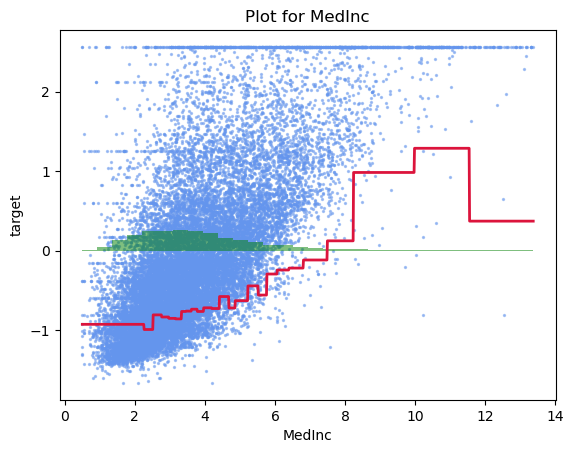

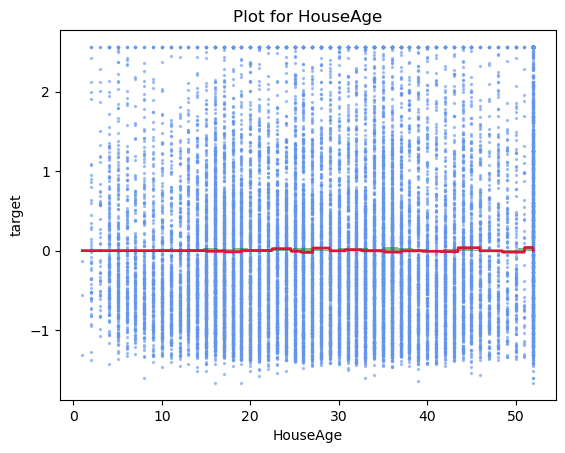

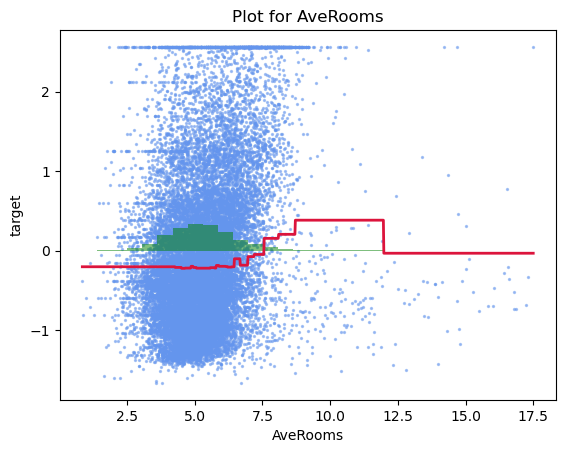

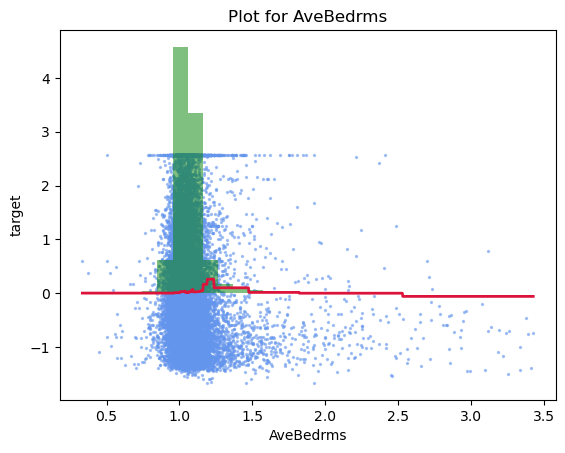

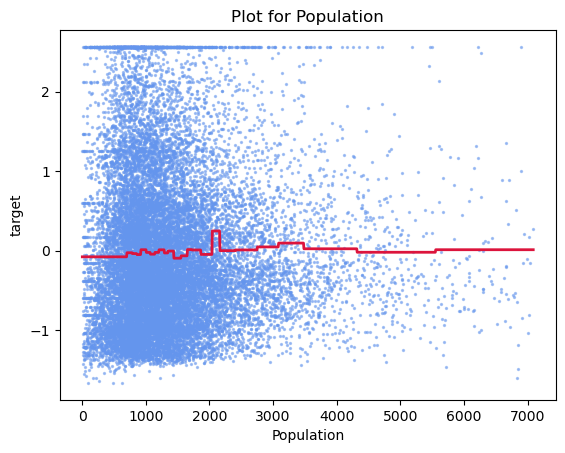

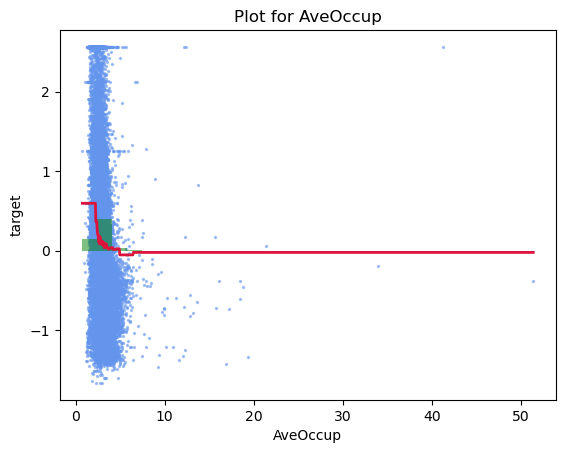

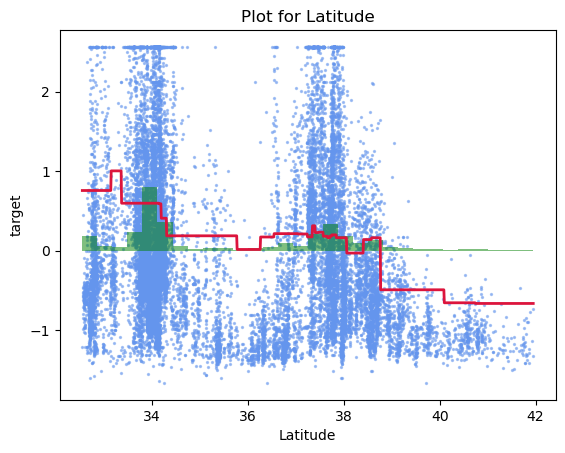

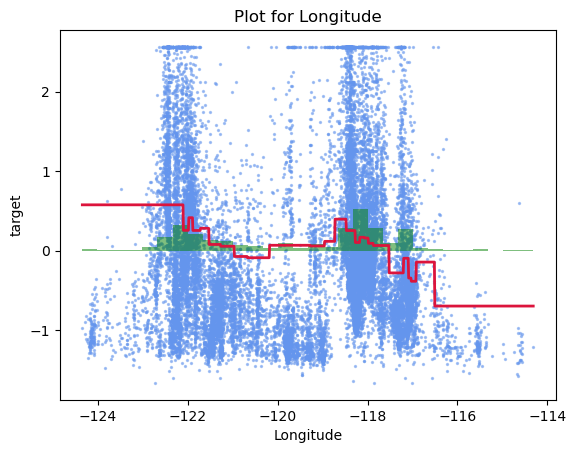

In [32]:
model.plot_features()